In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import os
import gc
import random
import dask.dataframe as dd
import sys
import pickle
import timeit
sns.set()

In [11]:
train_prep = pd.read_csv('C:\\Users\\jenif\\Desktop\\WiDS_datathon\\train_prep.csv')
train_prep.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,0,Caucasian,M,180.3,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,0,Caucasian,F,160.0,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,0,Caucasian,F,172.7,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,1,Caucasian,F,165.1,Operating Room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,0,Caucasian,M,188.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


# Add Column for encounters_per_hosp

In [12]:
#adding column to count number of encounters per hospital.  Because all encounter_ids are unique, we can just count instances
#of hospital_id
train_prep['enc_per_hosp'] = train_prep.groupby(['hospital_id'])['encounter_id'].transform('count')
train_prep.head(20)

,encounter_id,patient_id,hospital_id,hospital_death,age,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,enc_per_hosp
0,66154,25312,118,0,68.0,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,4333
1,114252,59342,81,0,77.0,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,580
2,119783,50777,118,0,25.0,0,Caucasian,F,172.7,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,4333
3,79267,46918,118,0,81.0,1,Caucasian,F,165.1,Operating Room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333
4,92056,34377,33,0,19.0,0,Caucasian,M,188.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,323
5,33181,74489,83,0,67.0,0,Caucasian,M,190.5,Direct Admit,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,820
6,82208,49526,83,0,59.0,0,Caucasian,F,165.1,Operating Room,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,820
7,120995,50129,33,0,70.0,0,Caucasian,M,165.0,Emergency Department,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,323
8,80471,10577,118,1,45.0,0,Caucasian,M,170.2,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333
9,42871,90749,118,0,50.0,0,NaN,M,175.3,Direct Admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333


In [16]:
# Create a column to store the bin categories - Frequencies of encounters by hospital (1 of the 4)
bins = [0,250, 500, 1000, 10000]
names = ['low', 'mid_low', 'mid_high', 'high']

train_prep['enc_per_hosp_cat'] = pd.cut(train_prep['enc_per_hosp'], bins, labels=names)
train_prep.head(100)

,encounter_id,patient_id,hospital_id,hospital_death,age,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,enc_per_hosp,enc_per_hosp_cat
0,66154,25312,118,0,68.0,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,4333,high
1,114252,59342,81,0,77.0,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,580,mid_high
2,119783,50777,118,0,25.0,0,Caucasian,F,172.7,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,4333,high
3,79267,46918,118,0,81.0,1,Caucasian,F,165.1,Operating Room,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333,high
4,92056,34377,33,0,19.0,0,Caucasian,M,188.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,323,mid_low
5,33181,74489,83,0,67.0,0,Caucasian,M,190.5,Direct Admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,820,mid_high
6,82208,49526,83,0,59.0,0,Caucasian,F,165.1,Operating Room,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,820,mid_high
7,120995,50129,33,0,70.0,0,Caucasian,M,165.0,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,323,mid_low
8,80471,10577,118,1,45.0,0,Caucasian,M,170.2,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333,high
9,42871,90749,118,0,50.0,0,NaN,M,175.3,Direct Admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333,high


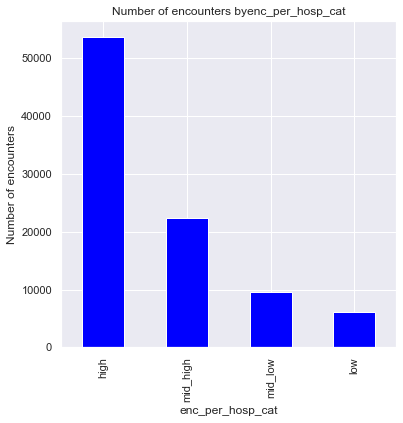

In [17]:
def plot_bars(train_prep, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) #define plot area
        ax = fig.gca() #define axis
        counts = train_prep[col].value_counts() #find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') #Use the plot.bar method on the counts data frame
        ax.set_title('Number of encounters by' + col) #Give the plot a main title
        ax.set_xlabel(col) #Set text for the x axis
        ax.set_ylabel('Number of encounters') #Set text for y axis
        plt.show()
        
plot_cols = ['enc_per_hosp_cat']
plot_bars(train_prep, plot_cols)

enc_per_hosp_cat


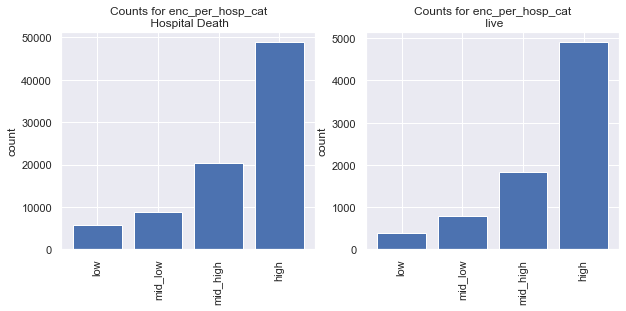

In [18]:
cat_cols = ['enc_per_hosp_cat']

train_prep['dummy'] = np.ones(shape = train_prep.shape[0])
for col in cat_cols:
    print(col)
    counts = train_prep[['dummy', 'hospital_death', col]].groupby(['hospital_death', col], as_index = False).count()
    temp = counts[counts['hospital_death'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['hospital_death'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Hospital Death')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['hospital_death'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n live')
    plt.ylabel('count')
    plt.show()